In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from causallearn.search.ScoreBased.GES import ges

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import pydot
import io
from IPython.display import Image, display

import networkx as nx

import json

In [2]:
# subjects
subjects = pd.read_csv("../data/raw/S1_Subjects.csv")
subjects

,SubjectID,consented,IRIS,SSPG,FPG,SSPG.Date,Class,Gender,Ethnicity,Adj.age,BMI,Num_All_Visits,Days_Span,Num_Healthy_Visits
0,ZOZOW1T,YES,IS,91.5,131.75,8/7/14,Diabetic,M,C,59.48,21.47,152,2475,56
1,ZOQSGYW,NO,Unknown,NaN,NaN,NaN,Crossover,M,A,58.40,21.86,5,515,4
2,ZOQM06Q,NO,Unknown,NaN,NaN,NaN,Prediabetic,F,A,25.91,19.37,3,23,2
3,ZODIOFW,NO,Unknown,NaN,NaN,NaN,Crossover,F,A,57.86,26.69,1,0,1
4,ZIS22OE,YES,Unknown,NaN,NaN,NaN,Prediabetic,F,C,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,ZK4CK8Y,YES,IS,40.0,87.00,4/23/13,Prediabetic,F,C,50.02,26.94,10,874,8
102,ZK112BX,NO,IR,234.0,115.00,5/7/13,Crossover,F,A,57.72,28.89,20,1271,11
103,ZK01UI6,NO,Unknown,NaN,NaN,NaN,Control,M,A,57.78,NaN,1,0,1
104,ZJXC41N,YES,IS,75.0,94.00,10/15/13,Prediabetic,F,B,49.69,28.24,23,982,7


In [3]:
subjects_iris_known = subjects[subjects['IRIS'] != 'Unknown']
subjects_iris_known

,SubjectID,consented,IRIS,SSPG,FPG,SSPG.Date,Class,Gender,Ethnicity,Adj.age,BMI,Num_All_Visits,Days_Span,Num_Healthy_Visits
0,ZOZOW1T,YES,IS,91.5,131.75,8/7/14,Diabetic,M,C,59.48,21.47,152,2475,56
12,ZNDMXI3,NO,IR,184.0,NaN,NaN,Prediabetic,F,A,44.81,34.49,7,1084,7
13,ZN9YTFN,YES,IS,140.0,98.25,1/13/15,Prediabetic,F,H,60.18,32.21,16,1145,11
15,ZN3TBJM,YES,IS,133.5,100.00,2/3/15,Prediabetic,F,C,67.47,30.18,43,1177,9
16,ZN0JE53,YES,IS,148.0,96.00,6/25/13,Prediabetic,M,B,66.81,33.32,18,1044,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,ZKFV71L,YES,IS,65.0,100.00,5/6/15,Prediabetic,F,B,66.08,32.54,17,1293,10
101,ZK4CK8Y,YES,IS,40.0,87.00,4/23/13,Prediabetic,F,C,50.02,26.94,10,874,8
102,ZK112BX,NO,IR,234.0,115.00,5/7/13,Crossover,F,A,57.72,28.89,20,1271,11
104,ZJXC41N,YES,IS,75.0,94.00,10/15/13,Prediabetic,F,B,49.69,28.24,23,982,7


In [6]:
subjects_iris_known[subjects_iris_known['IRIS'] == 'IR']['Num_Healthy_Visits'].sum()

215

In [7]:
# sample list 
samplelist = pd.read_csv("../data/raw/S3_SampleList.csv")
samplelist

,SubjectID,SampleID,Days_Since_Start,CL1,CL2,CL3,CL4,Cytokines,ClinicLabs,Metabolites,Proteins,Transcripts,Gut_16S,Nasal_16S,Num_Type
0,ZOZOW1T,ZOZOW1T-01,-1068.0,D0,UNK_I,Infection_Early,Infection,0,0,1,0,0,0,0,1
1,ZOZOW1T,ZOZOW1T-02,-1064.0,D4,UNK_II,Infection_Middle,Infection,0,0,1,0,1,0,0,2
2,ZOZOW1T,ZOZOW1T-03,-1047.0,D21,UNK_III,Infection_Recovery_Early,Infection_L,0,0,1,0,0,0,0,1
3,ZOZOW1T,ZOZOW1T-04,-960.0,NaN,UNK_IV,NaN,Healthy,0,0,0,0,1,0,0,1
4,ZOZOW1T,ZOZOW1T-05,-952.0,NaN,UNK_V,NaN,Healthy,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,ZJTKAE3,ZJTKAE3-6011,766.0,NaN,NaN,NaN,Healthy,1,1,1,0,0,1,1,5
1088,ZJTKAE3,ZJTKAE3-07,773.0,NaN,NaN,NaN,Fiber,1,1,1,1,1,0,0,5
1089,ZJTKAE3,ZJTKAE3-6021,829.0,NaN,NaN,NaN,Healthy,1,1,1,1,1,1,1,7
1090,ZJTKAE3,ZJTKAE3-6031,948.0,NaN,NaN,NaN,Healthy,1,1,1,1,1,0,1,6


In [ ]:
samplelist_gut = samplelist[samplelist['Gut_1

In [75]:
# gut microbes
gut_microbes = pd.read_csv("../data/raw/gut_16s_abundance.txt", sep = "\t")
gut_microbes.head()

,SampleID,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,...,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae
0,ZOZOW1T-1010,0.000449,0.650866,0.225080,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,0.000000,0.097431,0.007883,0.000035,0.000415,0.002386,0.015697,0.027452,0.000000,0.074128
1,ZOZOW1T-1011,0.000176,0.730518,0.184808,0.003900,0.008186,0.070902,0.000176,0.000070,0.730518,...,0.000035,0.070902,0.008713,0.000141,0.000176,0.000808,0.008608,0.011805,0.000000,0.069215
2,ZOZOW1T-1012,0.000597,0.178364,0.796861,0.000358,0.002788,0.020911,0.000597,0.000119,0.178364,...,0.000080,0.020911,0.022903,0.000518,0.000398,0.001713,0.000876,0.018362,0.000000,0.615351
3,ZOZOW1T-1015,0.000058,0.740726,0.226516,0.005977,0.001207,0.024971,0.000058,0.000029,0.740726,...,0.000029,0.024971,0.013046,0.000086,0.000029,0.004109,0.007730,0.043849,0.000029,0.067096
4,ZOZOW1T-1021,0.001113,0.554580,0.364195,0.038358,0.000059,0.041286,0.001113,0.000059,0.554580,...,0.000410,0.041286,0.006208,0.000117,0.000176,0.000468,0.000996,0.132584,0.015753,0.044624


In [76]:
# subject data
subject_info = pd.read_csv("../data/raw/subject_file.csv")
subject_info.head()

,SubjectID,Study,Race,Sex,Age,BMI,SSPG,IR_IS_classification
0,ZIS22OE,HMP,C,F,NaN,NaN,NaN,Unknown
1,ZJBOZ2X,Exercise,C,F,65.30,19.82,NaN,Unknown
2,ZJOSZHK,HMP,C,M,41.43,19.42,NaN,Unknown
3,ZJTKAE3,HMP,C,F,58.65,31.24,162.0,IR
4,ZJXC41N,"HMP, Exercise",B,F,49.69,28.24,75.0,IS


In [77]:
# add SubjectID column to gut_microbes
gut_microbes['SubjectID'] = gut_microbes['SampleID'].str.split('-').str[0]

In [78]:
gut_microbes.groupby('SubjectID').count()['SampleID'].value_counts()

SampleID
1      12
2      10
3      10
5       9
7       9
4       6
9       5
8       4
10      4
6       3
17      3
15      3
19      3
13      2
12      2
16      2
21      1
24      1
14      1
25      1
35      1
111     1
28      1
11      1
22      1
Name: count, dtype: int64

In [79]:
subject_info['Sex'].value_counts()

Sex
F    56
M    51
Name: count, dtype: int64

In [80]:
# find unique number of subjects in both datasets
# data cleaning: take their intersection (remove a few subjects)
print('Gut Microbes:', gut_microbes['SubjectID'].nunique(), '\n',
      'Subject Info:', subject_info['SubjectID'].nunique())

merged_df = pd.merge(gut_microbes, subject_info, on='SubjectID', how='inner')
merged_df.head()

Gut Microbes: 96 
 Subject Info: 107


,SampleID,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,...,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,SubjectID,Study,Race,Sex,Age,BMI,SSPG,IR_IS_classification
0,ZOZOW1T-1010,0.000449,0.650866,0.225080,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,0.000000,0.074128,ZOZOW1T,"HMP, Exercise",C,M,59.48,21.47,91.5,IS
1,ZOZOW1T-1011,0.000176,0.730518,0.184808,0.003900,0.008186,0.070902,0.000176,0.000070,0.730518,...,0.000000,0.069215,ZOZOW1T,"HMP, Exercise",C,M,59.48,21.47,91.5,IS
2,ZOZOW1T-1012,0.000597,0.178364,0.796861,0.000358,0.002788,0.020911,0.000597,0.000119,0.178364,...,0.000000,0.615351,ZOZOW1T,"HMP, Exercise",C,M,59.48,21.47,91.5,IS
3,ZOZOW1T-1015,0.000058,0.740726,0.226516,0.005977,0.001207,0.024971,0.000058,0.000029,0.740726,...,0.000029,0.067096,ZOZOW1T,"HMP, Exercise",C,M,59.48,21.47,91.5,IS
4,ZOZOW1T-1021,0.001113,0.554580,0.364195,0.038358,0.000059,0.041286,0.001113,0.000059,0.554580,...,0.015753,0.044624,ZOZOW1T,"HMP, Exercise",C,M,59.48,21.47,91.5,IS


In [81]:
merged_df['IR_IS_classification'].value_counts()

IR_IS_classification
IS         377
IR         286
Unknown    192
Name: count, dtype: int64

In [82]:
merged_df.groupby('SubjectID').first()['IR_IS_classification'].value_counts()

IR_IS_classification
Unknown    35
IR         33
IS         28
Name: count, dtype: int64

In [83]:
merged_df.groupby('SubjectID').nunique()['IR_IS_classification'].value_counts()

IR_IS_classification
1    96
Name: count, dtype: int64

In [84]:
# 6 phyla: Actinobacteria, Bacteroidetes, Firmicutes, Proteobacteria, Verrucomicrobia, Unclassified
# 12 classes
# 12 orders
# 21 families (includes unclassified)
# 45 genus (includes unclassified)

taxonomy = ['phylum', 'class', 'order', 'family', 'genus']
taxonomy_counts = {col: 0 for col in taxonomy}
for col in merged_df.columns:
    for tax in taxonomy:
        if tax in col:
            taxonomy_counts[tax] += 1
            
taxonomy_counts

{'phylum': 6, 'class': 28, 'order': 12, 'family': 21, 'genus': 45}

In [85]:
genus_col = []
for col in merged_df.columns:
    if "genus" in col:
        genus_col.append(col)

In [86]:
json.dumps(genus_col)

'["genus_Akkermansia", "genus_Alistipes", "genus_Anaerotruncus", "genus_Anaerovorax", "genus_Bacteroides", "genus_Barnesiella", "genus_Bilophila", "genus_Blautia", "genus_Butyricicoccus", "genus_Butyricimonas", "genus_Clostridium.IV", "genus_Clostridium.XI", "genus_Clostridium.XVIII", "genus_Clostridium.XlVa", "genus_Clostridium.XlVb", "genus_Clostridium.sensu.stricto", "genus_Collinsella", "genus_Coprococcus", "genus_Dorea", "genus_Eggerthella", "genus_Erysipelotrichaceae_incertae_sedis", "genus_Faecalibacterium", "genus_Flavonifractor", "genus_Holdemania", "genus_Lachnospiracea_incertae_sedis", "genus_Odoribacter", "genus_Oscillibacter", "genus_Parabacteroides", "genus_Parasutterella", "genus_Phascolarctobacterium", "genus_Prevotella", "genus_Pseudoflavonifractor", "genus_Roseburia", "genus_Ruminococcus", "genus_Streptococcus", "genus_Veillonella", "genus_unclassified_Bacteria", "genus_unclassified_Clostridiales", "genus_unclassified_Clostridiales_Incertae.Sedis.XIII", "genus_unclass

In [87]:
with open("../config/data-params.json") as fh:
    data_params = json.load(fh)

In [88]:
all_columns = []
for val in data_params.values():
    all_columns += val

In [89]:
# 1. figure out if we use linear vs non-linear methods

/var/folders/hc/mnggsfz56v305wwb48gk6cjm0000gp/T/ipykernel_69049/883072450.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


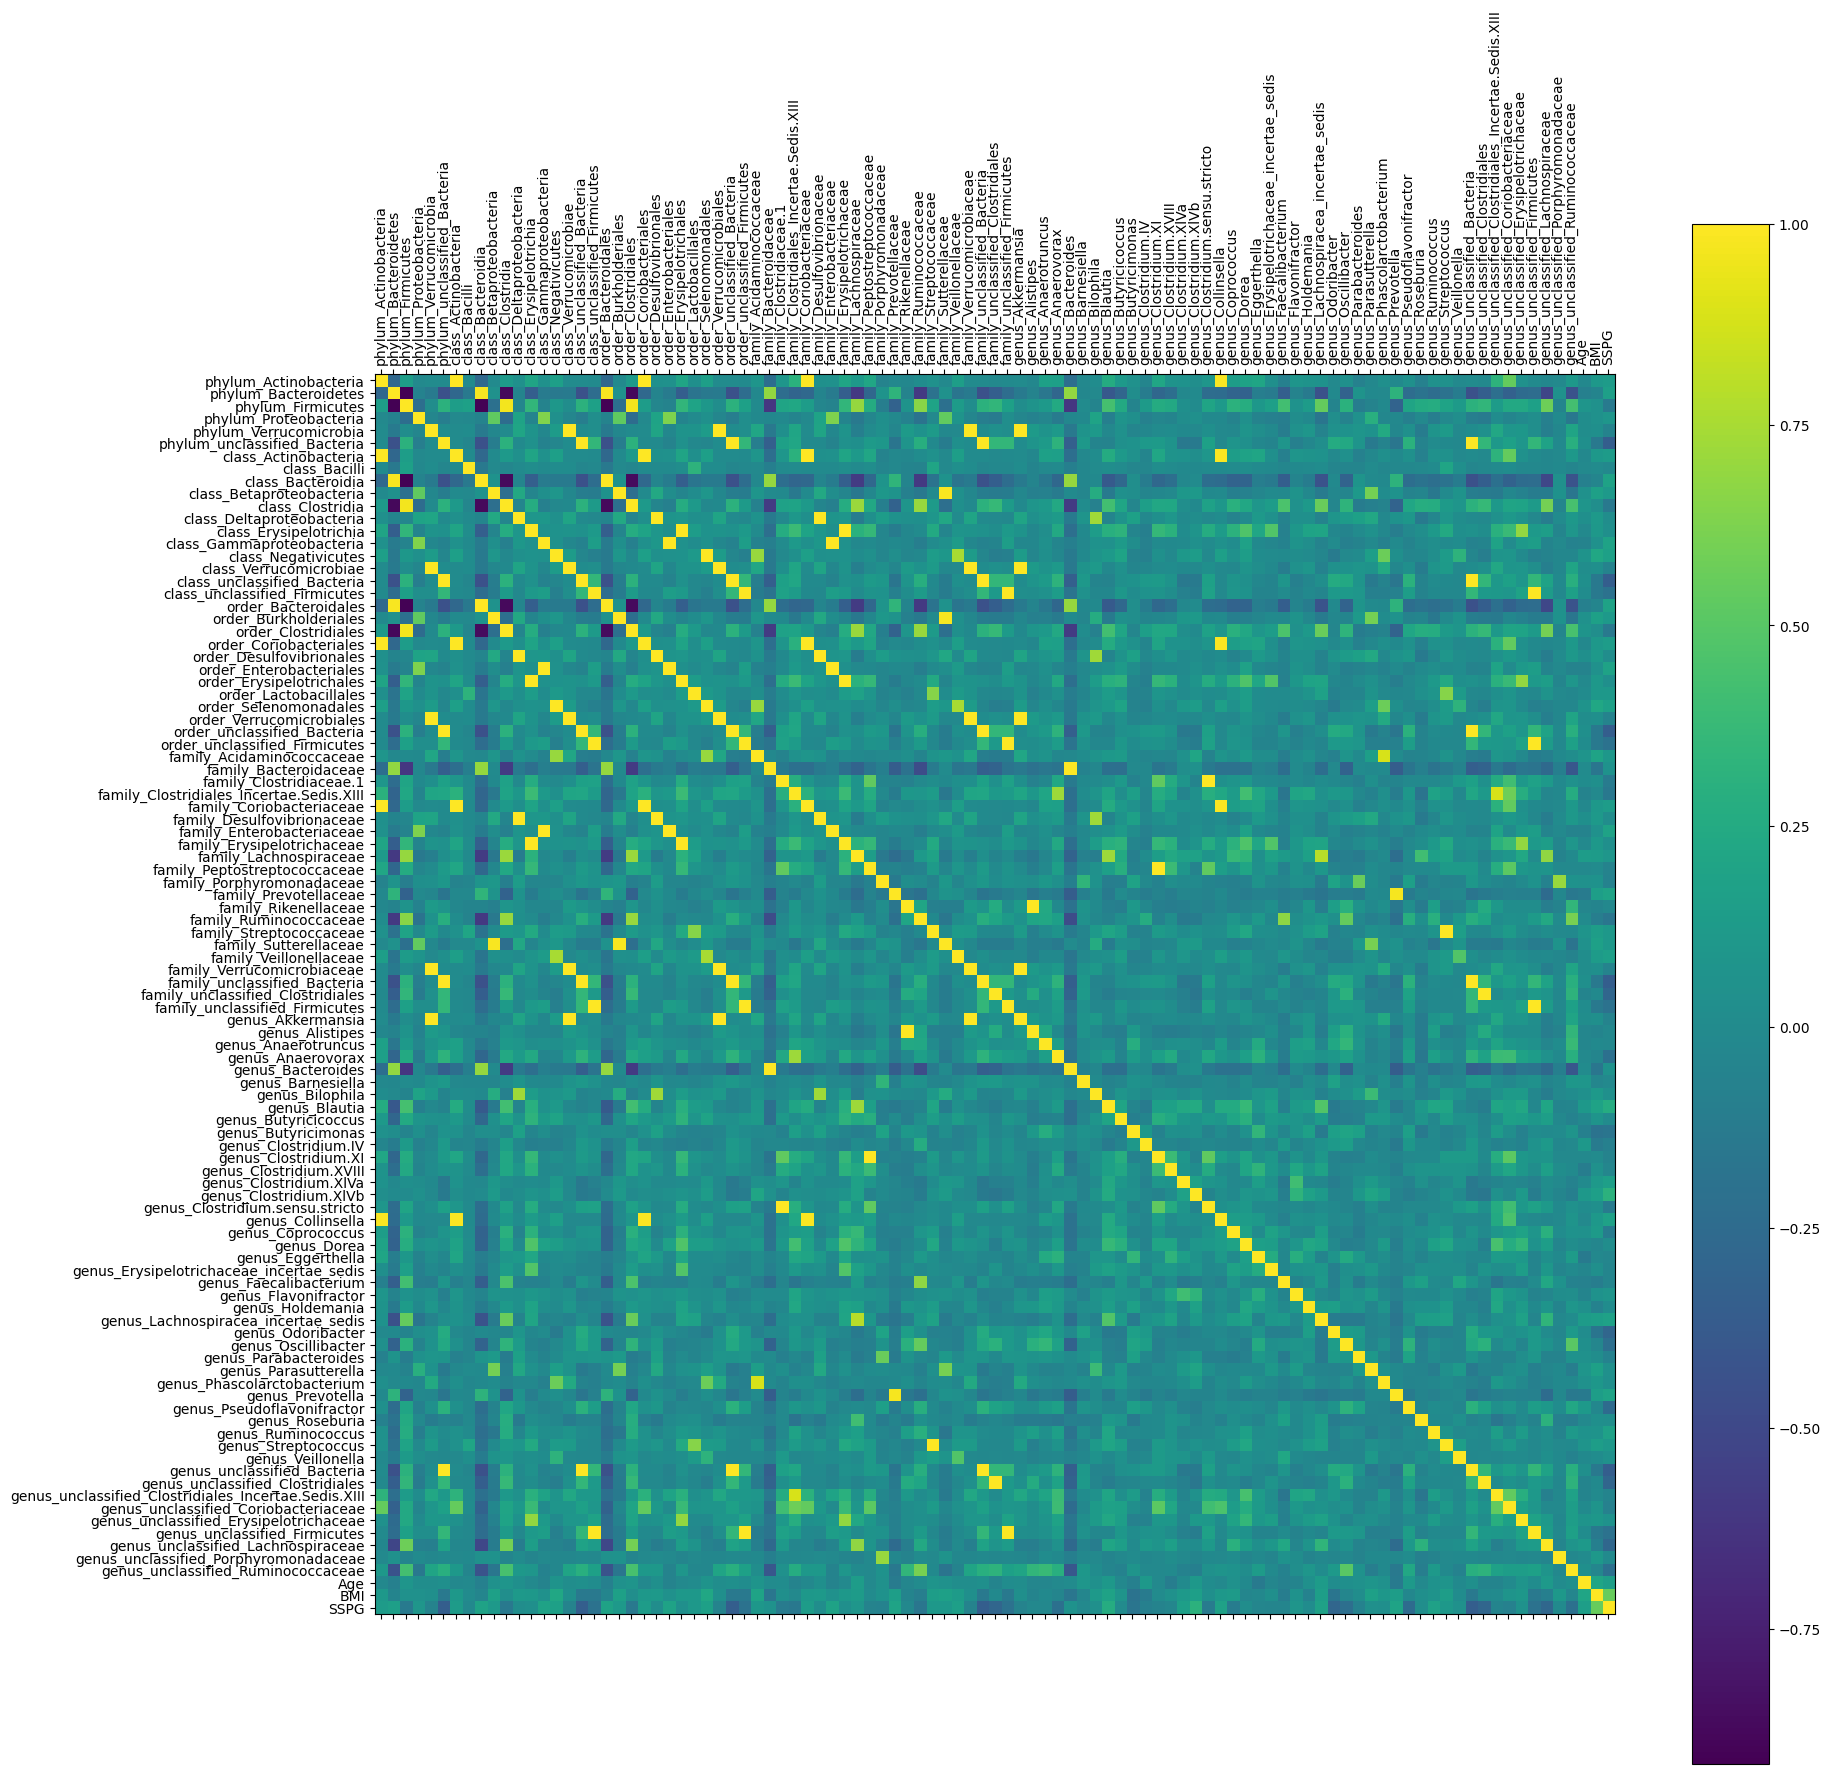

In [90]:
# correlation

X = merged_df.drop(columns = ['SubjectID', 'SampleID', 'Study', 'Race', 'Sex', 'IR_IS_classification'])

def make_corr_plot(data):
    corr = data.corr()
    full_columns = list(data.columns)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot()
    cax = ax.matshow(corr)
    fig.colorbar(cax)

    xaxis = np.arange(len(full_columns))
    ax.set_xticks(xaxis)
    ax.set_yticks(xaxis)
    ax.set_xticklabels(full_columns, rotation=90)
    ax.set_yticklabels(full_columns)

    fig.show()

    return


make_corr_plot(X)

/var/folders/hc/mnggsfz56v305wwb48gk6cjm0000gp/T/ipykernel_69049/883072450.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


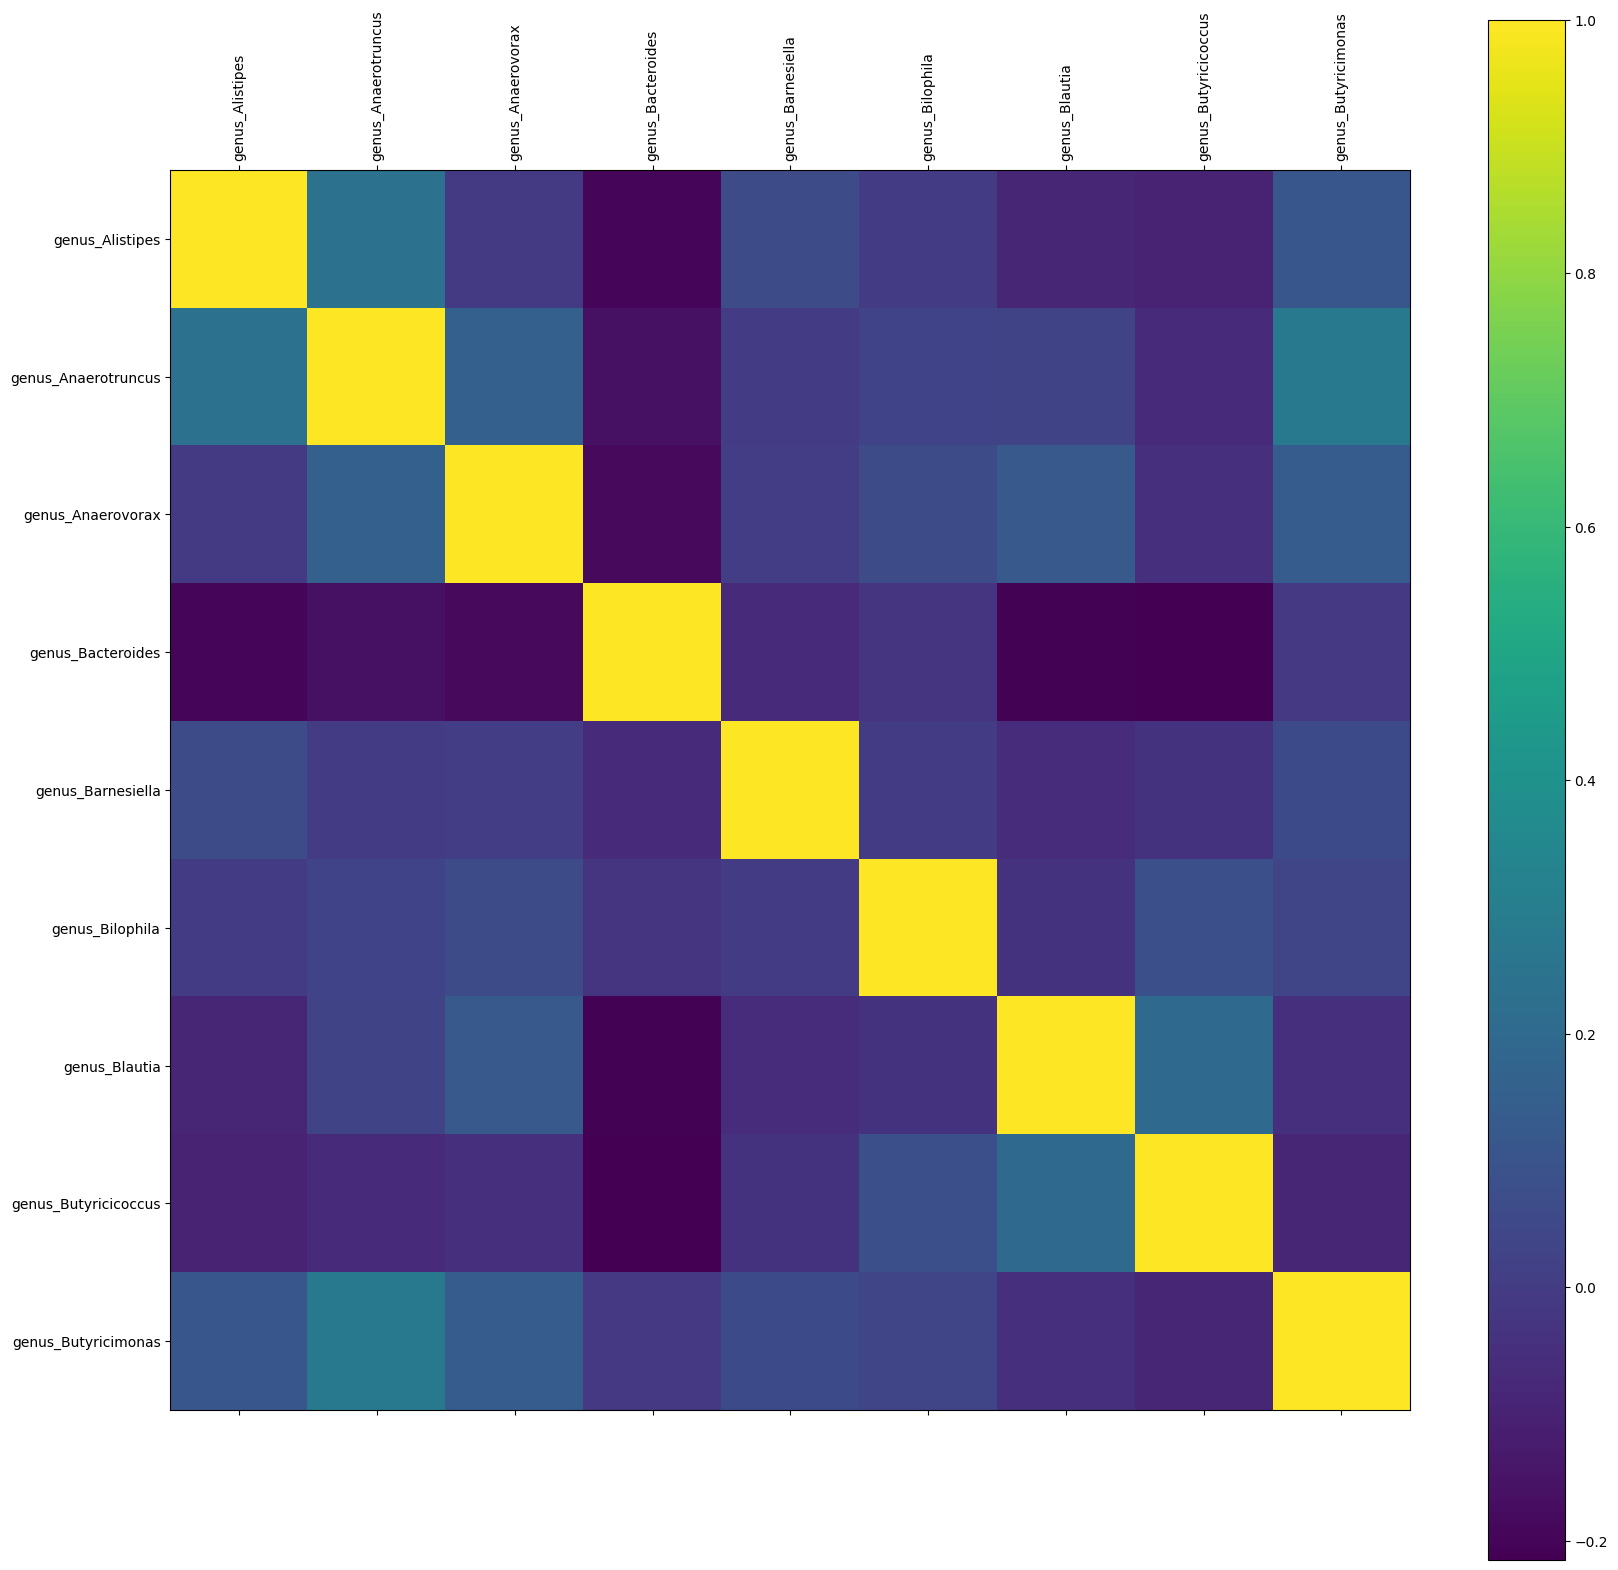

In [91]:
# smaller dataset for test run

mini_X = X.loc[:, genus_col]
mini_X = mini_X.iloc[:, 1:10]

make_corr_plot(mini_X)

In [ ]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import kci

cg = pc(mini_X.values, 0.05, kci)

  0%|          | 0/9 [00:00<?, ?it/s]

In [92]:
# run ges

Record = ges(mini_X.values)

In [93]:
Record

{'update1': [[1, 8, ()],
  [1, 0, ()],
  [7, 3, ()],
  [0, 3, [7]],
  [3, 6, ()],
  [2, 3, ()],
  [2, 1, (0,)],
  [7, 6, ()]],
 'update2': [],
 'G_step1': [<causallearn.graph.GeneralGraph.GeneralGraph at 0x16a97bfb0>,
 'G_step2': [],
 'G': <causallearn.graph.GeneralGraph.GeneralGraph at 0x168fa3500>,
 'score': matrix([[-78244.79814488]])}

In [94]:
print(Record['G'].__str__())

Graph Nodes:
X1;X2;X3;X4;X5;X6;X7;X8;X9

Graph Edges:
1. X1 --> X2
2. X1 --> X4
3. X3 --> X2
4. X2 --> X9
5. X3 --> X4
6. X4 --> X7
7. X8 --> X4
8. X8 --> X7



In [95]:
G = nx.DiGraph(Record['G'].graph.values)
nx.draw_networks(G)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

AttributeError: 'list' object has no attribute 'items'

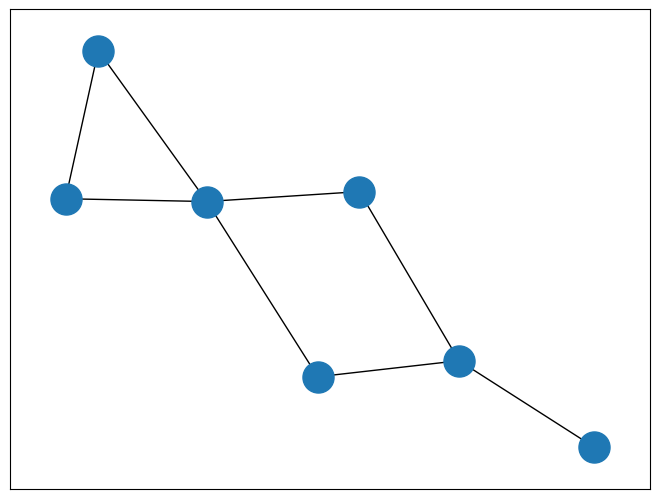

In [50]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()


show_graph_with_labels(Record['G'].graph, list(mini_X.columns))

In [48]:
Record['G'].graph.

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [36]:
Record['G'].dpath

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 1]])

In [37]:
pyd = GraphUtils.to_pydot(Record['G'], labels = mini_X.columns)

In [38]:
print(pyd.__str__())

digraph {
fontsize=18;
dpi=200;
0 [label=X1];
0 [label="genus_Alistipes"];
1 [label=X2];
1 [label="genus_Anaerotruncus"];
2 [label=X3];
2 [label="genus_Anaerovorax"];
3 [label=X4];
3 [label="genus_Bacteroides"];
4 [label=X5];
4 [label="genus_Barnesiella"];
5 [label=X6];
5 [label="genus_Bilophila"];
6 [label=X7];
6 [label="genus_Blautia"];
7 [label=X8];
7 [label="genus_Butyricicoccus"];
8 [label=X9];
8 [label="genus_Butyricimonas"];
0 -> 1 [dir=both, arrowtail=none, arrowhead=normal];
0 -> 3 [dir=both, arrowtail=none, arrowhead=normal];
2 -> 1 [dir=both, arrowtail=none, arrowhead=normal];
1 -> 8 [dir=both, arrowtail=none, arrowhead=normal];
2 -> 3 [dir=both, arrowtail=none, arrowhead=normal];
3 -> 6 [dir=both, arrowtail=none, arrowhead=normal];
7 -> 3 [dir=both, arrowtail=none, arrowhead=normal];
7 -> 6 [dir=both, arrowtail=none, arrowhead=normal];
}



In [20]:
from graphviz import Digraph
import networkx as nx

In [21]:
pyd = GraphUtils.to_pydot(Record['G'], labels = mini_X.columns)

In [22]:
# set up venv
# try other packages


In [24]:
nx_graph = nx.DiGraph()
nx_graph.add_nodes_from(Record['G'].get_nodes())
nx_graph.add_edges_from(Record['G'].get_graph_edges())

NameError: name 'nx' is not defined

In [ ]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

    
view_pydot(pyd)

In [13]:
# plot ges
pyd = GraphUtils.to_pydot(Record['G'], labels = mini_X.columns)
pyd.write_png('causal_graph_GES_miniX.png')
Image(filename='causal_graph_GES_miniX.png')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [3]:
!export PATH="$PATH:/home/cys226/.local/lib/python3.9/site-packages"

In [4]:
!dot -V

/bin/bash: dot: command not found


In [30]:
!which dot

In [ ]:
export PATH=$PATH:/path/to/pydot